In [1]:
import pickle
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from utils import check_in_weights, check_out_weights

In [2]:
# load graph object from file
G = pickle.load(open('graphs/081224_normalized_march_22_home_origin.pickle', 'rb')) # TAKING THE NETWORK WITH NORMALIZED WEIGHTS , FIXED
income = gpd.read_file('/Users/caro/Desktop/thesis_project/segregation_indices/data/processed/geometries_and_income.geojson')

In [3]:
in_weights = check_in_weights(G)
out_weights = check_out_weights(G)

# Convert dictionaries to DataFrames
in_weights_df = pd.DataFrame(list(in_weights.items()), columns=['District', 'Total In-weight'])
out_weights_df = pd.DataFrame(list(out_weights.items()), columns=['District', 'Total Out-weight'])

Node Centro Total In-weight: 2.49
Node Arganzuela Total In-weight: 1.46
Node Retiro Total In-weight: 1.47
Node Salamanca Total In-weight: 2.26
Node Chamartín Total In-weight: 1.93
Node Tetuán Total In-weight: 1.55
Node Chamberí Total In-weight: 2.14
Node Fuencarral-El Pardo Total In-weight: 2.25
Node Moncloa-Aravaca Total In-weight: 1.62
Node Latina Total In-weight: 1.24
Node Carabanchel Total In-weight: 1.56
Node Usera Total In-weight: 1.26
Node Puente de Vallecas Total In-weight: 1.72
Node Moratalaz Total In-weight: 0.99
Node Ciudad Lineal Total In-weight: 1.65
Node Hortaleza Total In-weight: 1.86
Node Villaverde Total In-weight: 1.23
Node Villa de Vallecas Total In-weight: 1.31
Node Vicálvaro Total In-weight: 1.03
Node San Blas-Canillejas Total In-weight: 1.78
Node Barajas Total In-weight: 1.2
Node Centro Total Out-weight: 0.92
Node Arganzuela Total Out-weight: 1.07
Node Retiro Total Out-weight: 1.13
Node Salamanca Total Out-weight: 0.97
Node Chamartín Total Out-weight: 0.98
Node Te

In [4]:
in_weights_df['Median income per consumption unit'] = income['Median income per consumption unit'] / 1000
in_weights_df['Gini Index'] = income['Gini Index']

out_weights_df['Median income per consumption unit'] = income['Median income per consumption unit'] / 1000
out_weights_df['Gini Index'] = income['Gini Index']

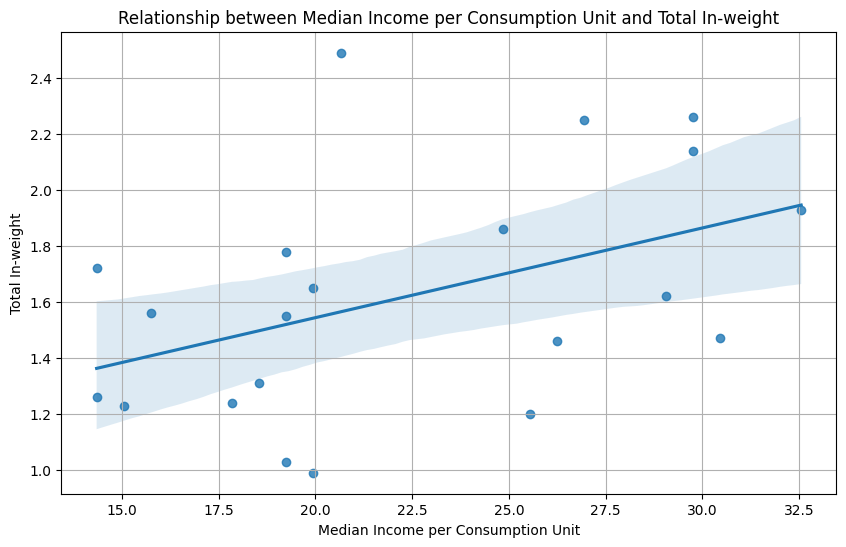

In [5]:
plt.figure(figsize=(10, 6)) # use 32.5 to improve explicability
sns.regplot(x='Median income per consumption unit', y='Total In-weight', data=in_weights_df)
plt.xlabel('Median Income per Consumption Unit')
plt.ylabel('Total In-weight')
plt.title('Relationship between Median Income per Consumption Unit and Total In-weight')
plt.grid(True)
plt.show()

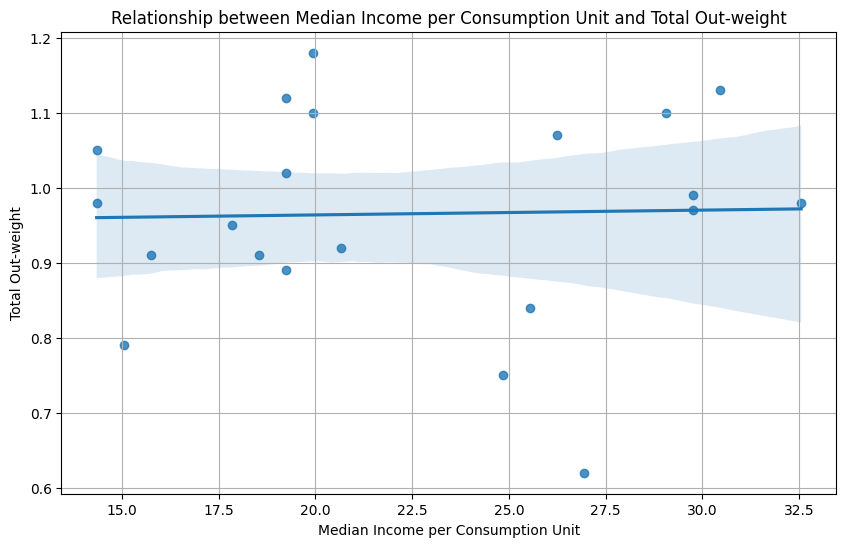

In [6]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Median income per consumption unit', y='Total Out-weight', data=out_weights_df)
plt.xlabel('Median Income per Consumption Unit')
plt.ylabel('Total Out-weight')
plt.title('Relationship between Median Income per Consumption Unit and Total Out-weight')
plt.grid(True)
plt.show()

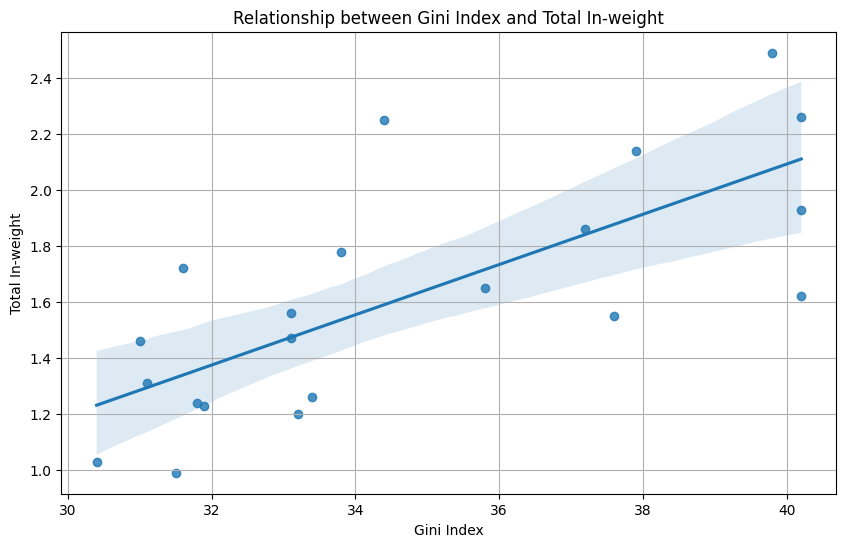

In [7]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Gini Index', y='Total In-weight', data=in_weights_df)
plt.xlabel('Gini Index')
plt.ylabel('Total In-weight')
plt.title('Relationship between Gini Index and Total In-weight')
plt.grid(True)
plt.show()

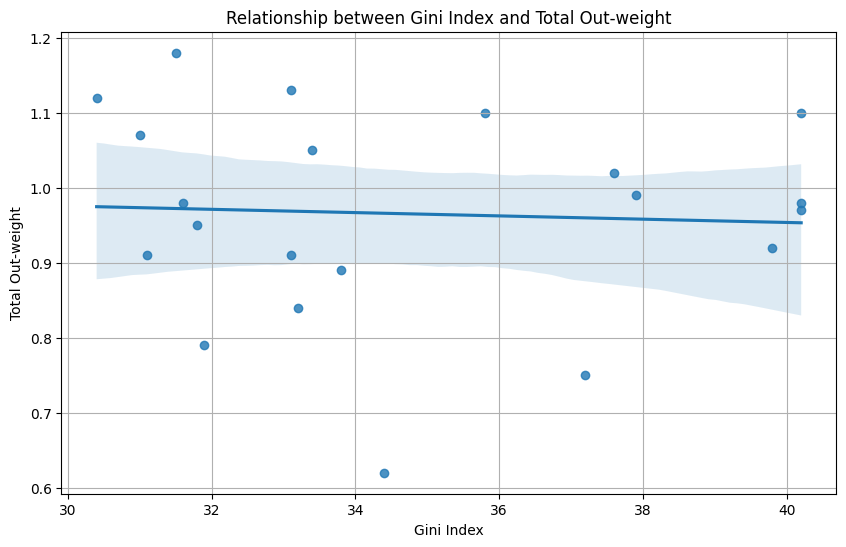

In [8]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Gini Index', y='Total Out-weight', data=out_weights_df)
plt.xlabel('Gini Index')
plt.ylabel('Total Out-weight')
plt.title('Relationship between Gini Index and Total Out-weight')
plt.grid(True)
plt.show()

In [9]:
X = in_weights_df['Median income per consumption unit']
y = in_weights_df['Total In-weight']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Step 3: Fit the regression model
model = sm.OLS(y, X).fit()

# Step 4: Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Total In-weight   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     4.693
Date:                Sun, 08 Dec 2024   Prob (F-statistic):             0.0432
Time:                        15:12:05   Log-Likelihood:                -8.7386
No. Observations:                  21   AIC:                             21.48
Df Residuals:                      19   BIC:                             23.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

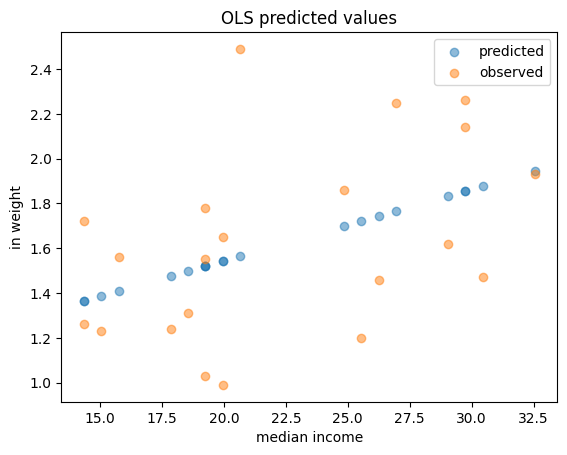

In [10]:
fix, ax = plt.subplots()
ax.scatter(in_weights_df['Median income per consumption unit'], model.predict(), alpha=0.5,
        label='predicted')

# Plot observed values

ax.scatter(in_weights_df['Median income per consumption unit'], in_weights_df['Total In-weight'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('median income')
ax.set_ylabel('in weight')
plt.show()

In [11]:
X = out_weights_df['Median income per consumption unit']
y = out_weights_df['Total Out-weight']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Step 3: Fit the regression model
model = sm.OLS(y, X).fit()

# Step 4: Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Total Out-weight   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                   0.01393
Date:                Sun, 08 Dec 2024   Prob (F-statistic):              0.907
Time:                        15:12:06   Log-Likelihood:                 12.290
No. Observations:                  21   AIC:                            -20.58
Df Residuals:                      19   BIC:                            -18.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

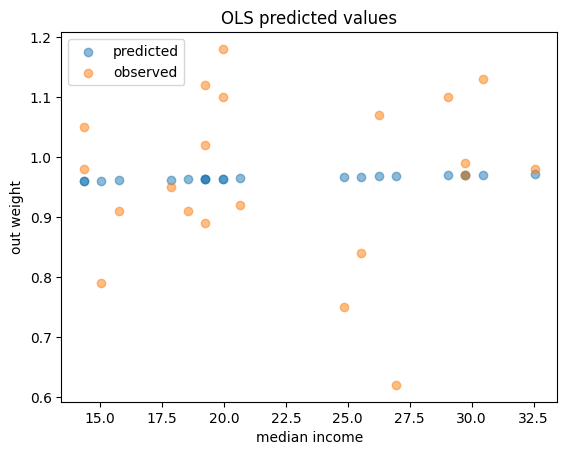

In [12]:
fix, ax = plt.subplots()
ax.scatter(out_weights_df['Median income per consumption unit'], model.predict(), alpha=0.5,
        label='predicted')

# Plot observed values

ax.scatter(out_weights_df['Median income per consumption unit'], out_weights_df['Total Out-weight'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('median income')
ax.set_ylabel('out weight')
plt.show()

In [13]:
X = in_weights_df['Gini Index']
y = in_weights_df['Total In-weight']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Step 3: Fit the regression model
model = sm.OLS(y, X).fit()

# Step 4: Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Total In-weight   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     21.84
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           0.000166
Time:                        15:12:06   Log-Likelihood:                -3.0219
No. Observations:                  21   AIC:                             10.04
Df Residuals:                      19   BIC:                             12.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4968      0.670     -2.235      0.0

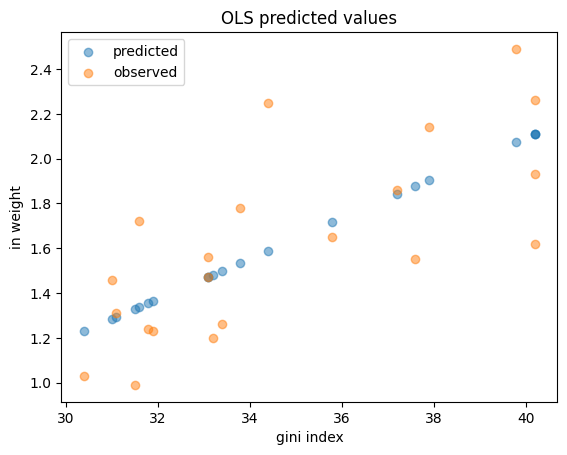

In [14]:
fix, ax = plt.subplots()
ax.scatter(in_weights_df['Gini Index'], model.predict(), alpha=0.5,
        label='predicted')

# Plot observed values

ax.scatter(in_weights_df['Gini Index'], in_weights_df['Total In-weight'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('gini index')
ax.set_ylabel('in weight')
plt.show()

In [15]:
X = out_weights_df['Gini Index']
y = out_weights_df['Total Out-weight']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Step 3: Fit the regression model
model = sm.OLS(y, X).fit()

# Step 4: Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Total Out-weight   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.050
Method:                 Least Squares   F-statistic:                   0.05605
Date:                Sun, 08 Dec 2024   Prob (F-statistic):              0.815
Time:                        15:12:07   Log-Likelihood:                 12.313
No. Observations:                  21   AIC:                            -20.63
Df Residuals:                      19   BIC:                            -18.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0413      0.323      3.227      0.0

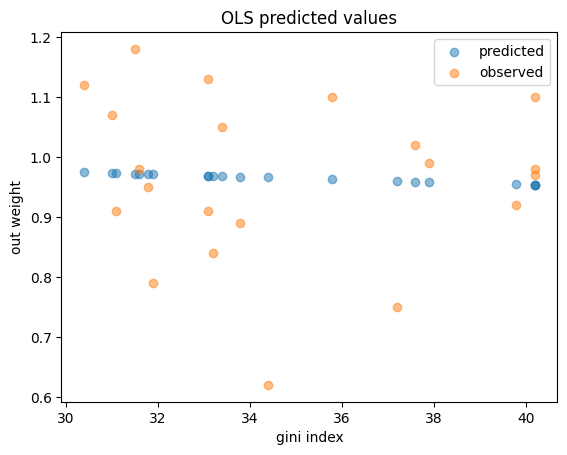

In [16]:
fix, ax = plt.subplots()
ax.scatter(out_weights_df['Gini Index'], model.predict(), alpha=0.5,
        label='predicted')

# Plot observed values

ax.scatter(out_weights_df['Gini Index'], out_weights_df['Total Out-weight'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('gini index')
ax.set_ylabel('out weight')
plt.show()

In [17]:
in_weights_df

,District,Total In-weight,Median income per consumption unit,Gini Index
0,Centro,2.49,20.65,39.8
1,Arganzuela,1.46,26.25,31.0
2,Retiro,1.47,30.45,33.1
3,Salamanca,2.26,29.75,40.2
4,Chamartín,1.93,32.55,40.2
5,Tetuán,1.55,19.25,37.6
6,Chamberí,2.14,29.75,37.9
7,Fuencarral-El Pardo,2.25,26.95,34.4
8,Moncloa-Aravaca,1.62,29.05,40.2
9,Latina,1.24,17.85,31.8


In [18]:
out_weights_df

,District,Total Out-weight,Median income per consumption unit,Gini Index
0,Centro,0.92,20.65,39.8
1,Arganzuela,1.07,26.25,31.0
2,Retiro,1.13,30.45,33.1
3,Salamanca,0.97,29.75,40.2
4,Chamartín,0.98,32.55,40.2
5,Tetuán,1.02,19.25,37.6
6,Chamberí,0.99,29.75,37.9
7,Fuencarral-El Pardo,0.62,26.95,34.4
8,Moncloa-Aravaca,1.10,29.05,40.2
9,Latina,0.95,17.85,31.8
